# Vectors

Esta tabla contiene la información de las expresiones del tipo vector (Listas, diccionarios, etc). 

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('vectors')

# Table name, features and target.
TABLE_NAME = 'vectors'
TABLE_FEATURES = ['vector__category', 'vector__number_of_elements', 'vector__homogeneous', 'vector__expertise_level']
TABLE_TARGET = 'vector__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-17 11:33:37.995720 Loading data ...
2025-01-17 11:33:40.212103 Data successfully load!!
2025-01-17 11:33:40.212103 Creating data cache files ...
2025-01-17 11:33:40.228873 Data cache files successfully created!!
Features shape: (38873, 4)
Target shape: (38873,)
As we can see the downloaded data contains a total of 38873 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38873 entries, 0 to 38872
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   vector__category            38873 non-null  object
 1   vector__number_of_elements  38873 non-null  int64 
 2   vector__homogeneous         38873 non-null  bool  
 3   vector__expertise_level     38873 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 949.2+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 38873 entries, 0 to 38872
Series name: vector__expertise_level
Non-Null Count  Dtype 
--------------  ----- 
38873 non-null  object
dtypes: object(1)
memory usage: 303.8+ KB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 1 variables boleanas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [24]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 29.4% instances for BEGINNER class and 70.6% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

vector__category              0
vector__number_of_elements    0
vector__homogeneous           0
vector__expertise_level       0
dtype: int64

In [5]:
print_empty_cols(X)

vector__category
----------------
0 instancias no tienen un valor para la columna vector__category


vector__number_of_elements
--------------------------
0 instancias no tienen un valor para la columna vector__number_of_elements


vector__homogeneous
-------------------
0 instancias no tienen un valor para la columna vector__homogeneous


vector__expertise_level
-----------------------
0 instancias no tienen un valor para la columna vector__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vector__category,38873,4,ListLiteral,18666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__number_of_elements,38873.0,NaN,NaN,NaN,2.314872,3.329939,0.0,1.0,2.0,3.0,112.0
vector__homogeneous,38873,2,False,20898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__expertise_level,38873,2,PROFESSIONAL,27443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "vector__number_of_elements": [(0.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, inf)], # min: 0 ; max: 14519
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['vector__number_of_elements'], 10))
print(get_statistics(full_table, ['vector__category'], 10))
print(get_statistics(X_copy, ['vector__homogeneous'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
vector__number_of_elements  count  percentage
                 [0.0_2.0)  15440   39.719085
                 [2.0_2.0]  13631   35.065470
                 [3.0_inf]   9802   25.215445

 vector__category  count  percentage
      ListLiteral  18666   48.017904
     TupleLiteral  11783   30.311527
DictionaryLiteral   7918   20.368894
       SetLiteral    506    1.301675

 vector__homogeneous  count  percentage
               False  20898   53.759679
                True  17975   46.240321

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (38873, 8)
Target shape: (38873,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

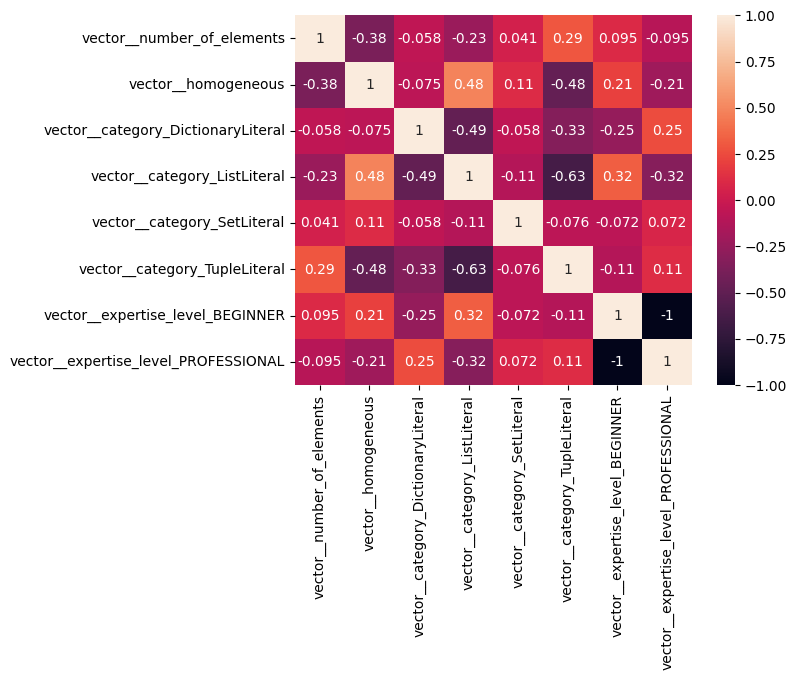

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica, 1 booleanas y 1 categorica) se hara un analisis detallado

### Variable homogeneous (1/3)
Esta variable es de tipo booleano y representa si todos los elementos de la lista son del mismo tipo.

<Axes: xlabel='vector__homogeneous', ylabel='Count'>

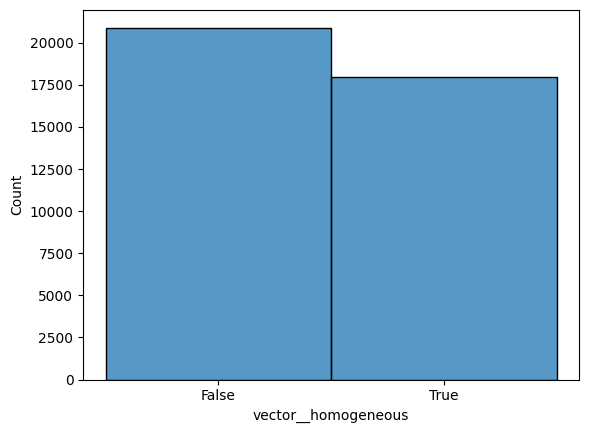

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['vector__homogeneous'], discrete=True)

In [11]:
num_true_values = len(X[X['vector__homogeneous'] == True])
num_false_values = len(X[X['vector__homogeneous'] == False])
std = X['vector__homogeneous'].std()
freq_true = len(X[X['vector__homogeneous'] == True]) / len(X['vector__homogeneous'])
freq_false = len(X[X['vector__homogeneous'] == False]) / len(X['vector__homogeneous'])
print(f'La variable homogeneous contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a False es {freq_false}.')

La variable homogeneous contiene 17975 valores verdaderos y 20898 valores falsos. Y, la desviación típica es de 0.498590886592865
La frecuencia con la que programa puede tener la variable homogeneous a True es 0.4624032104545571.
La frecuencia con la que programa puede tener la variable homogeneous a False es 0.5375967895454429.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'vector__homogeneous', possible_values)

La variable vector__homogeneous contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable vector__homogeneous toma el valor de 0.0 en un 53.76% de los items.
La variable vector__homogeneous toma el valor de 1.0 en un 46.24% de los items.


In [13]:
X[X['vector__homogeneous'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral,vector__expertise_level_BEGINNER,vector__expertise_level_PROFESSIONAL
count,17975.000000,17975.0,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,2.014854,1.0,0.171238,0.738081,0.026036,0.064645,0.396718,0.603282
std,4.087824,0.0,0.376727,0.439691,0.159247,0.245906,0.489230,0.489230
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,59.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_elements (2/3)
Esta variable representa el número de elementos en la lista. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 112. Con una media de 2.31.

<Axes: ylabel='vector__number_of_elements'>

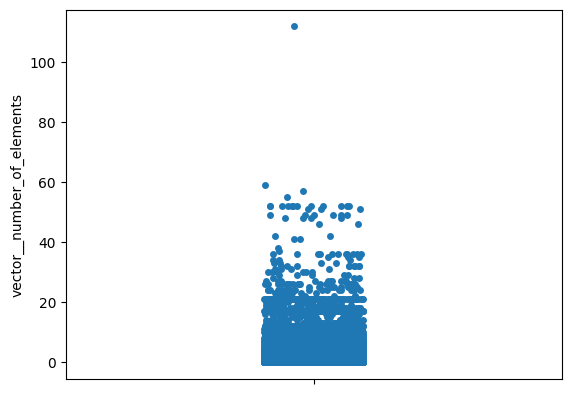

In [14]:
sns.stripplot(X['vector__number_of_elements'])

### IMPORTANT
El valor maximo esta muy alejado de los siguientes valores.

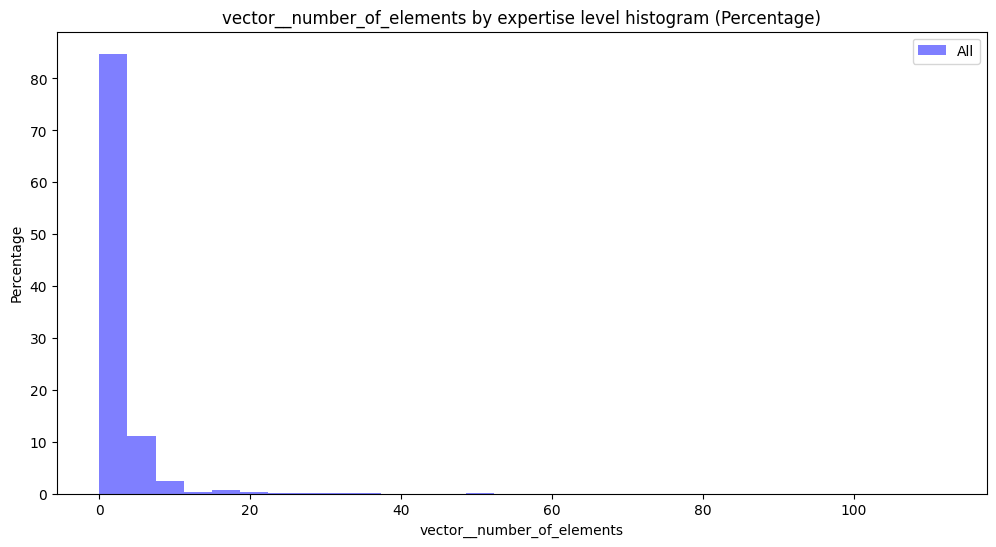

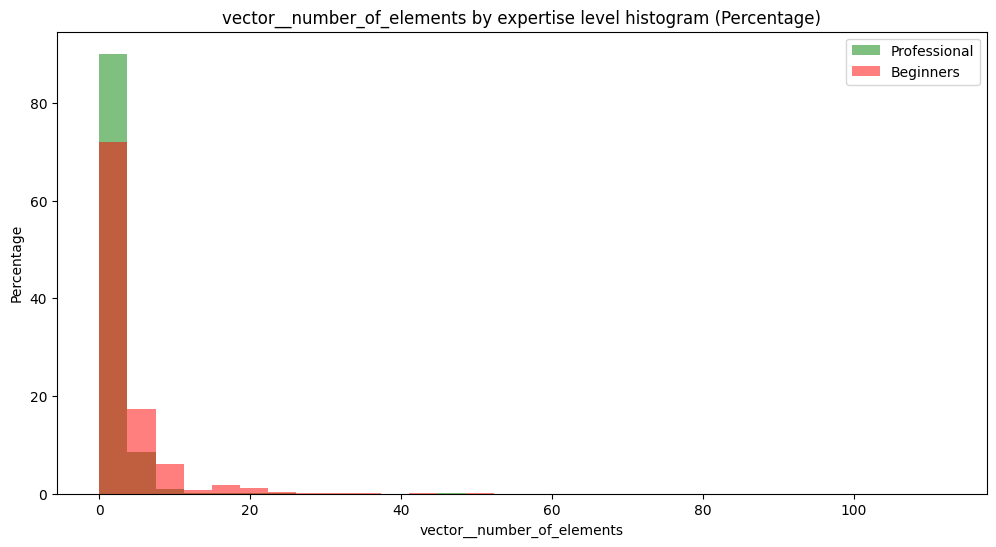

In [15]:
print_histogram(X, 'vector__number_of_elements', 'vector__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'vector__number_of_elements', 'vector__expertise_level', bins=30, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'vector__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6387936640888416
Rango valores atípicos extremos (Tukey): [-5.0,9.0]
Rango valores atípicos leves (Tukey): [-2.0,6.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.679273176607797,41.620643724417214]
-3.0IQR: 0 instancias tienen un valor para vector__number_of_elements inferior a -5.0 (Q1-3*IQR) para vector__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para vector__number_of_elements inferior a -2.0 (Q1-1.5*IQR) para vector__number_of_elements. Representando un 0.0% del total de instancias.
+1.5IQR: 2163 instancias tienen un valor para vector__number_of_elements superior a 6.0 (Q3+1.5*IQR) para vector__number_of_elements. Representando un 5.564% del total de instancias.
+3.0IQR: 1104 instancias tienen un valor para vector__number_of_elements superior a 9.0 (Q3-3*IQR) para vector__number_of_elements. Representando un 2.84% del total de instancias.
L: 8797 instanc

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 41,6 (Con un MC de 638 usamos U)

In [25]:
X[X['vector__number_of_elements'] > 41,6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

InvalidIndexError: (0        False
1        False
2        False
3        False
4        False
         ...  
38868    False
38869    False
38870    False
38871    False
38872    False
Name: vector__number_of_elements, Length: 38873, dtype: bool, 6)

### Variable category (3/3)
Esta variable es de tipo categorica y representa el tipo del vector.

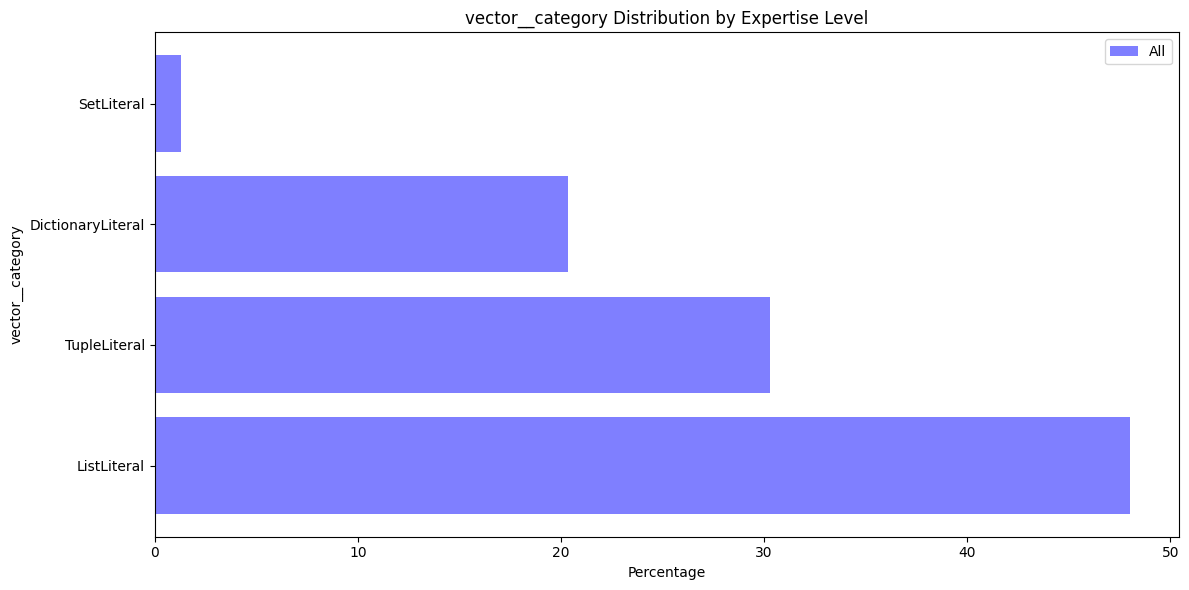

In [18]:
print_categorical_histogram(full_table, 'vector__category',TABLE_TARGET, include_all=True, include_experts=False, include_beginners=False)

In [19]:
print_frequency_anal_for_cat_var(full_table, 'vector__category')

La variable vector__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable vector__category toma el valor de ListLiteral en un 48.02% de los items.
La variable vector__category toma el valor de TupleLiteral en un 30.31% de los items.
La variable vector__category toma el valor de DictionaryLiteral en un 20.37% de los items.
La variable vector__category toma el valor de SetLiteral en un 1.302% de los items.


In [20]:
print_values_usage_for_cat_var(full_table, 'vector__category', VECTOR_CATEGORY_VALUES)

La variable vector__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [21]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,vector__category,vector__number_of_elements,vector__homogeneous,vector__expertise_level
6892,TupleLiteral,27,False,PROFESSIONAL
10194,SetLiteral,9,True,PROFESSIONAL
10196,SetLiteral,9,True,PROFESSIONAL
10197,SetLiteral,9,True,PROFESSIONAL
13545,DictionaryLiteral,46,False,PROFESSIONAL
13546,SetLiteral,9,True,PROFESSIONAL
14906,SetLiteral,12,True,PROFESSIONAL
19447,DictionaryLiteral,46,False,PROFESSIONAL
19448,SetLiteral,9,True,PROFESSIONAL
20619,SetLiteral,9,True,PROFESSIONAL


### IMPORTANTE
Revisar los outliers detectados.

In [22]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,43.0,26.000000,20.339968,9.0,12.0,18.0,38.5,112.0
vector__homogeneous,43.0,0.627907,0.489083,0.0,0.0,1.0,1.0,1.0
vector__category_DictionaryLiteral,43.0,0.534884,0.504685,0.0,0.0,1.0,1.0,1.0
vector__category_ListLiteral,43.0,0.139535,0.350605,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,43.0,0.255814,0.441481,0.0,0.0,0.0,0.5,1.0
vector__category_TupleLiteral,43.0,0.069767,0.257770,0.0,0.0,0.0,0.0,1.0
vector__expertise_level_BEGINNER,43.0,0.674419,0.474137,0.0,0.0,1.0,1.0,1.0
vector__expertise_level_PROFESSIONAL,43.0,0.325581,0.474137,0.0,0.0,0.0,1.0,1.0


In [23]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,38830.0,2.288643,3.167229,0.0,1.0,2.0,3.0,59.0
vector__homogeneous,38830.0,0.462220,0.498577,0.0,0.0,0.0,1.0,1.0
vector__category_DictionaryLiteral,38830.0,0.203322,0.402475,0.0,0.0,0.0,0.0,1.0
vector__category_ListLiteral,38830.0,0.480556,0.499628,0.0,0.0,0.0,1.0,1.0
vector__category_SetLiteral,38830.0,0.012748,0.112186,0.0,0.0,0.0,0.0,1.0
vector__category_TupleLiteral,38830.0,0.303374,0.459721,0.0,0.0,0.0,1.0,1.0
vector__expertise_level_BEGINNER,38830.0,0.293613,0.455423,0.0,0.0,0.0,1.0,1.0
vector__expertise_level_PROFESSIONAL,38830.0,0.706387,0.455423,0.0,0.0,1.0,1.0,1.0
